<a href="https://colab.research.google.com/github/FattySeagull/Rosenthal-Plateau-Rayleigh/blob/main/rpr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.optimize import fsolve

import matplotlib.pyplot as plt

# Rosenthal's solution for a moving point heat source

Christiansen's operating parameter
$$
N = \frac{A P v}{4\pi \kappa \alpha (T_m-T_0)}
$$

In [2]:
def Christiansen_N(P, v, A, Tm, T0, kappa, alpha):
    return A*P*v/(4.0*np.pi*kappa*alpha*(Tm - T0))

Non-dimensional Rosenthal's solution for a moving point heat source on semi-infinite plate
$$
\frac{\Theta}{N} = \frac{1}{\rho}\exp{(-\rho-\xi)}
$$
where $\rho = \sqrt{\xi^2+\psi^2+\zeta^2}$


In [3]:
def Rosenthal(xi, eta, psi, N):
    rho = np.sqrt(xi**2+eta**2+psi**2)
    return N*np.exp(-rho-xi)/rho

## Obtaining the width of melt pool
On the peripheral of melt pool, $\Theta = 1$, and $\rho=\rho_m$,
$$
\frac{1}{N} = \frac{1}{\rho}\exp{(-\rho-\xi)}
$$
At the waist of melt pool, $\partial (1/N)/\partial \xi = 0$, or $\partial \ln(1/N)/\partial \xi = 0$,
$$
\frac{\partial \ln(1/N)}{\partial \xi}
 = \frac{\partial \ln(1/N)}{\partial \rho} \frac{\partial \rho}{\partial \xi}
$$
Partial derivatives are
$$
\frac{\partial \rho}{\partial \xi}=\frac{2\xi}{2\sqrt{\xi^2+\psi^2+\zeta^2}}=\frac {\xi} {\rho}
\\
\frac{\partial \ln(1/N)}{\partial \rho} = \frac{\partial}{\partial \rho}(-\ln \rho -\rho -\xi)=-\frac 1 \rho -1 -\frac{\rho}{\xi}
$$

Substituting them
$$
\frac{\partial \ln(1/N)}{\partial \xi} = (-\frac 1 \rho -1)(\frac{\xi}{\rho}) -1
= \frac{-\rho^2-(1+\rho)\xi}{\rho^2} = 0
$$
Then
$$
\xi = -\frac{\rho^2}{1+\rho}
$$
Therefore
$$
\frac{1}{N} = \frac{1}{\rho_m}\exp{(-\frac{\rho_m}{\rho_m+1})}
$$
After obtaining $\rho_m$ by solfing the above non-linear equation,
$$
\xi_m = -{\rho_m^2}/(1+\rho_m) \\
\psi_m = \zeta_m = \sqrt{\rho_m^2-\xi_m^2}=\frac{\rho_m}{1+\rho_m}\sqrt{1+2\rho_m}
$$
$\psi_m$ is the half of he width of melt pool, $w$
$$
w = 2\psi_m
$$


In [4]:
def Rosenthal_width(N):
    ro =  np.abs(fsolve(lambda y: Rosenthal(0.0, y, 0.0, N) -1.0, 0.1))
    rm = fsolve(lambda x: x*np.exp(x/(1+x))/N - 1.0, ro)[0]
    xm = -rm**2/(1+rm)
    pm = rm/(1+rm)*np.sqrt(1+2*rm)
    w = 2.0*pm
    return w, xm, pm, rm

## Melt pool length
Melt pool's head tip is $(\xi_1, 0, 0)$, *i.e.* $\rho = \xi_1$. On the melt pool's peripheral, $\Theta = 1$.
$$
\frac 1 N = \frac 1 \xi_1 \exp{(-2\xi_1)}  \quad or \quad \xi_1\exp(2\xi_1) = N
$$
At the tail tip, $(-\xi_2, 0, 0), *i.e.* $\rho = \xi_2$.

$$
\frac 1 N = \frac 1 \xi_2 \exp{(-\xi_2-(-\xi_2))}\quad or \quad \xi_2 = N
$$
Then, the melt pool length is
$$
L=\xi_1+\xi_2
$$

In [5]:
def Rosenthal_length(N):
    xi2 = N
    xi1 = fsolve(lambda x: x*np.exp(2*x) - N, 0.01)[0]
    return xi1 + xi2, xi1, xi2

## Melt pool length at the bottom of powder bed
Melt pool's head tip is $(\xi'_1, 0, \zeta')$
$$
\frac 1 N = \frac 1 \xi'_1 \exp{\left(-\sqrt{{\xi'_1}^2+\zeta'^2}-\xi'_1\right)}
$$

Instead to sovle the above non-linear equation,
$$
\xi'_1≈\sqrt{\rho_m^2-\zeta'^2}
$$
where $\rho_m$ is obtained for the top surface peripheral of melt pool.

At the tail tip, $(-\xi'_2, 0, \zeta')$,

$$
\frac 1 N = \frac 1 {\xi'_2} \exp{\left(-\sqrt{{\xi'_2}^2+\zeta'^2}+\xi'_2\right)}
$$

Then, the melt pool length is
$$
L'=\xi'_1+\xi'_2
$$

#Plateau-Reyleigh instability to breakout the tail of melt pool

$$
t_b = \left(0.3433\sqrt{\frac{\gamma_{LV}}{\rho (w/2)^3}}\right)^{-1}
$$

In [6]:
def Reyleigh_tb(w, gm, rho):
    return 1.0/(0.3433*np.sqrt(gm/(rho*(w/2)**3)))

In [7]:
def Reyleigh_ts(v, l):
    return l/v

In [8]:
def Plot_contour(ax, xx, yy, zz, title = '', levels = [], xlim = [], ylim = []):
  if len(levels)>0:
    contour = ax.contour(xx, yy, zz, colors='black', levels=levels)
  else:
    contour = ax.contour(xx, yy, zz, colors='black')
  ax.clabel(contour, inline=True, fontsize=20)
  if len(xlim)>0:
    ax.set_xlim(xlim)
  if len(ylim)>0:
    ax.set_ylim(ylim)
  if title != '':
    ax.set_title(title, fontsize=28)
  ax.set_xlabel('Scanning speed, mm/s', fontsize=28)
  ax.set_ylabel('Laser Power, W', fontsize=28)
  ax.tick_params(axis='x', labelsize=24)
  ax.tick_params(axis='y', labelsize=24)
  #ax.set_aspect('equal', adjustable='box')
  ax.grid(linestyle='dashed')

# Code

In [9]:
  if __name__=='__main__':
    #@title Physical properties
    #@markdown Material
    mat = 'Inconel 718' #@param {type: "string"}
    #@markdown $\alpha$ thermal conductivity, W/(m K)
    lmd = 11.4      #@param {type:"number"}
    #@markdown $\rho$ density, $\rm{kg/m^3}$
    den = 8.19E+03 #@param {type:"number"}
    #@markdown $c_p$ specific heat capacity, J/(kg K)
    cp = 435.0 #@param {type:"number"}
    #@markdown $\alpha$ thermal conductivity, W/(m K)
    alph = lmd/(den*cp)
    #@markdown $T_m$ liquidus, degC
    Tm = 1336.0 #@param {type:"number"}
    #@markdown $A$ laser absorpability
    A = 0.3 #@param {type: "number"}

    #@markdown $\rho_2$ density
    den2 = 7.580E+3 #@param {type:"number"}
    #@markdown $\gamma_{LV}$ surface temsion, N/m
    gm = 1.82 #@param {type:"number"}

    # パラメータを設定
    #@markdown $T_0$ powder bed temp, degC
    T0 = 50.0 #@param {type:"number"}

In [10]:
  #@title Process map range to calculate
  #@markdown Laser power, W
  P_low = 25  #@param {type: "number"}
  P_high = 1100 #@param {type: "number"}
  P_inc = 25 #@param {type: "number"}
  #@markdown Scanning speed, mm/s
  v_low = 50  #@param {type: "number"}
  v_high = 4000 #@param {type: "number"}
  v_inc = 50 #@param {type: "number"}

  P = np.arange(P_low, P_high + P_inc, P_inc)    # 移動点熱源の熱量,
  v = np.arange(v_low, v_high + v_inc, v_inc)*1E-3  # 移動点熱源の速度, m/s
  # P = np.arange(500, 1100 + 50, 50)    # 移動点熱源の熱量,
  # v = np.arange(1000, 4000 + 250, 250)*1E-3  # 移動点熱源の速度, m/s
  # # P = np.arange(100, 1100 + 100, 100)    # 移動点熱源の熱量,
  # v = np.arange(100, 4000 + 500, 500)*1E-3  # 移動点熱源の速度, m/s
  PP, vv = np.meshgrid(P, v)

In [11]:
    #@title Christiansen's operating parameter, N
    N = [Christiansen_N(pe, ve,  A, Tm, T0, lmd, alph) for pe, ve in zip(PP.ravel(), vv.ravel())]


In [12]:
    #@title Melt pool width and length (unit m)
    width = [Rosenthal_width(n)[0] * 2.0*alph/ve for n, ve in zip(N, vv.ravel())]
    length = [Rosenthal_length(n)[0] * 2.0*alph/ve for n, ve in zip(N, vv.ravel())]
    depth = [w*0.5 for w in width]

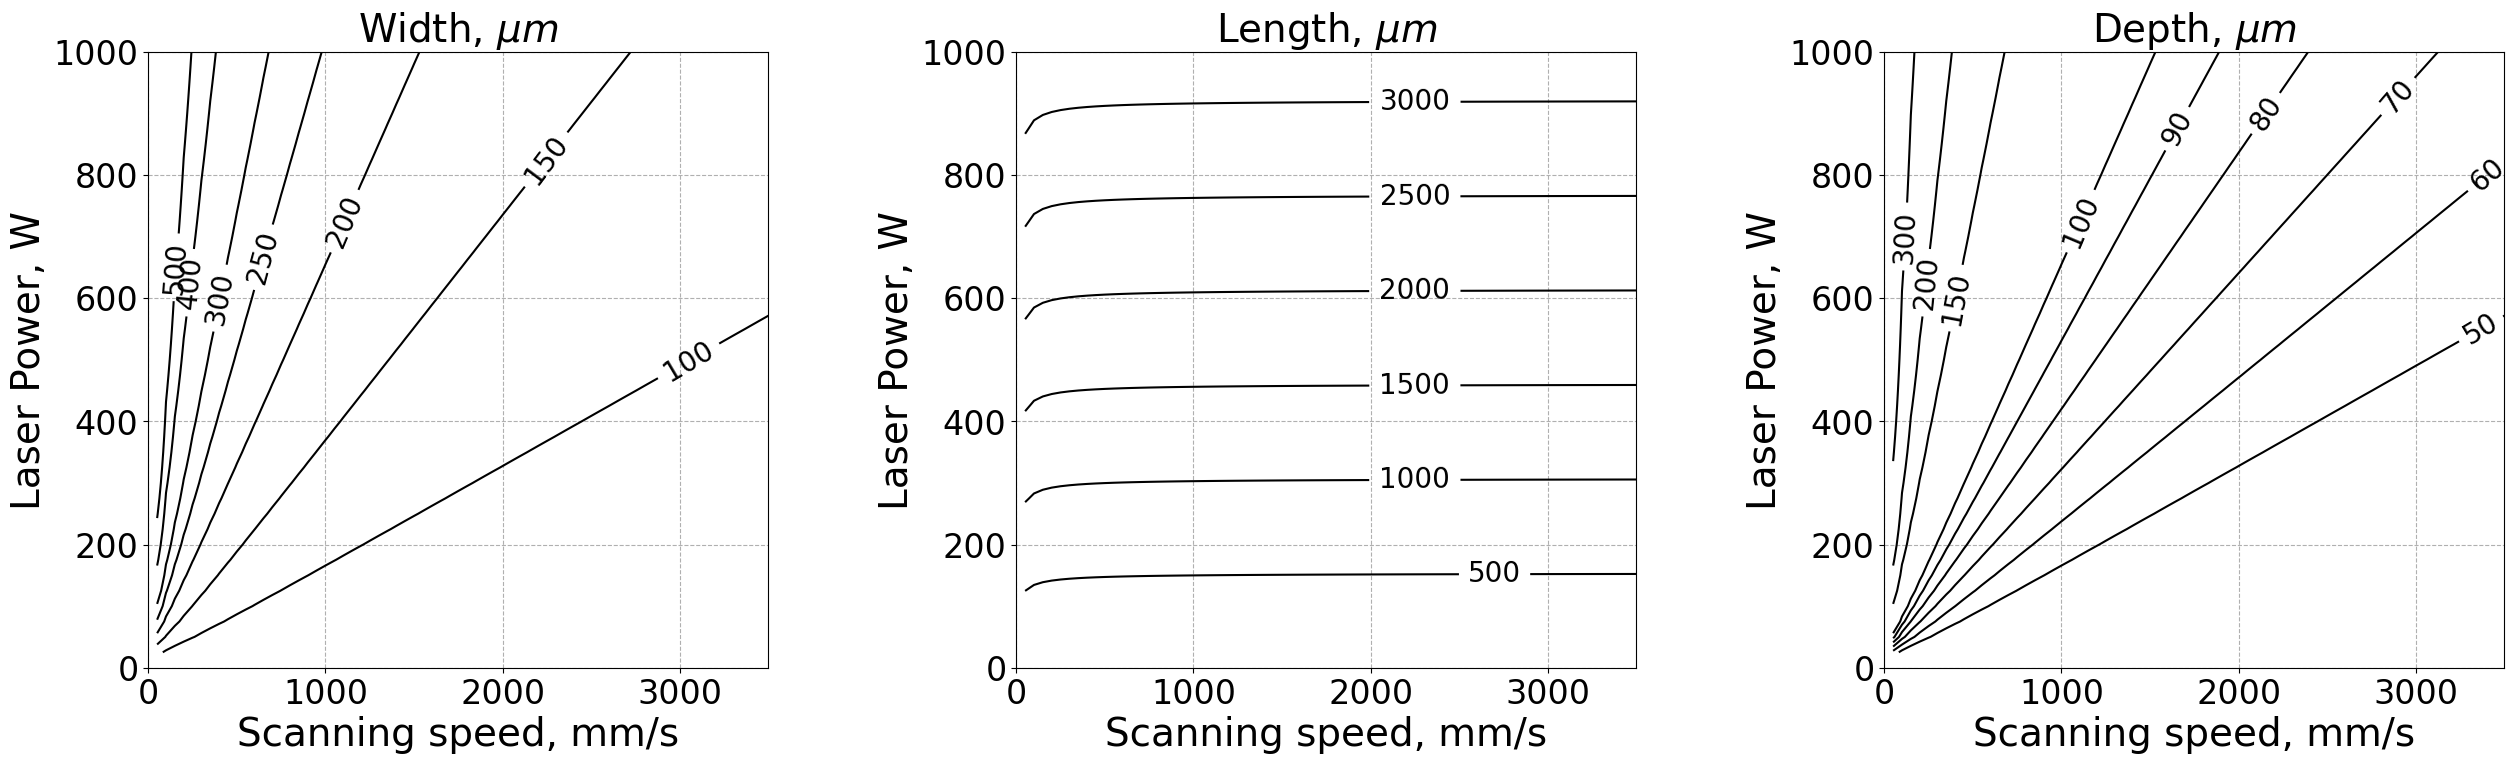

In [13]:
    ww = np.array(width).reshape(PP.shape) * 1E+6 # unit: um
    ll = np.array(length).reshape(PP.shape)* 1E+6 # unit: um
    dd = np.array(depth).reshape(PP.shape) * 1E+6 # unit: um

    height = 8   # 正方形の図形を作成するために図のサイズを設定
    fig = plt.figure(figsize=((3+0.4*2)*height, height))
    plt.subplots_adjust(wspace=0.4)
    ax1 = fig.add_subplot(1,3,1)
    Plot_contour(ax1, vv*1E+3, PP, ww,\
                 title = r'Width, $\mu m$',\
                 xlim = [0, 3500], ylim = [0, 1000],\
                 levels = [100,150,200,250,300,400,500])
    ax2 = fig.add_subplot(1,3,2)
    Plot_contour(ax2, vv*1E+3, PP, ll,\
                 title = r'Length, $\mu m$',\
                 xlim = [0, 3500], ylim = [0, 1000])
    ax3 = fig.add_subplot(1,3,3)
    Plot_contour(ax3, vv*1E+3, PP, dd,\
                 title = r'Depth, $\mu m$',\
                 xlim = [0, 3500], ylim = [0, 1000],\
                 levels = [50, 60, 70, 80, 90, 100,150,200,300])
    plt.savefig("width-length-depth.png")
    plt.show()


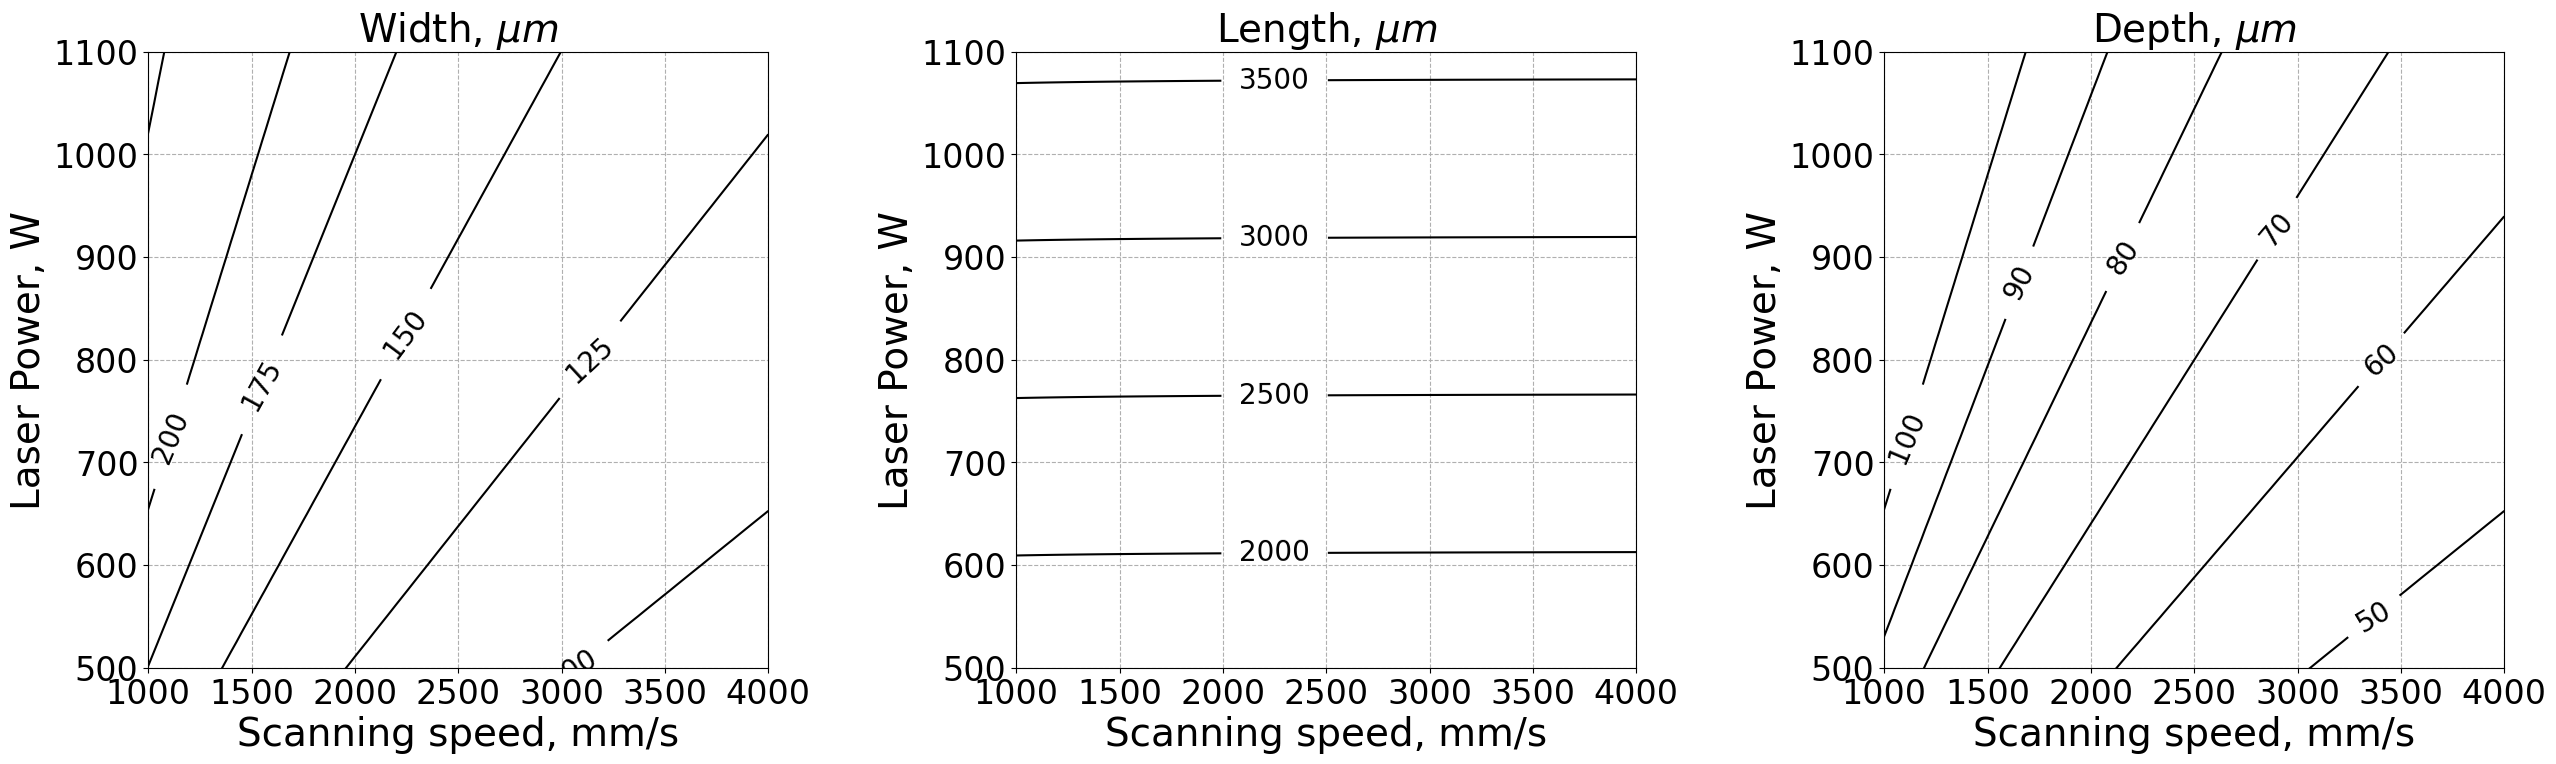

In [14]:
    ww = np.array(width).reshape(PP.shape) * 1E+6 # unit: um
    ll = np.array(length).reshape(PP.shape)* 1E+6 # unit: um
    dd = np.array(depth).reshape(PP.shape) * 1E+6 # unit: um

    height = 8   # 正方形の図形を作成するために図のサイズを設定
    fig = plt.figure(figsize=((3+0.4*2)*height, height))
    plt.subplots_adjust(wspace=0.4)
    ax1 = fig.add_subplot(1,3,1)
    Plot_contour(ax1, vv*1E+3, PP, ww,\
                 title = r'Width, $\mu m$',\
                 xlim = [1000, 4000], ylim = [500, 1100],\
                 levels = [100,125, 150, 175, 200, 250])
    ax2 = fig.add_subplot(1,3,2)
    Plot_contour(ax2, vv*1E+3, PP, ll,\
                 title = r'Length, $\mu m$',\
                 xlim = [1000, 4000], ylim = [500, 1100])
    ax3 = fig.add_subplot(1,3,3)
    Plot_contour(ax3, vv*1E+3, PP, dd,\
                 title = r'Depth, $\mu m$',\
                 xlim = [1000, 4000], ylim = [500, 1100],\
                 levels = [50, 60, 70, 80, 90, 100,150,200,300])
    plt.savefig("width-length-depth-hphv.png")  #hphv: high power high velocity
    plt.show()


In [15]:
    #@title Plateau-Reyleigh instability
    tb = [Reyleigh_tb(w, gm, den) for w in width]
    prl = [t*ve for t, ve in zip(tb, vv.ravel())] # length of liquid pillar to break-up

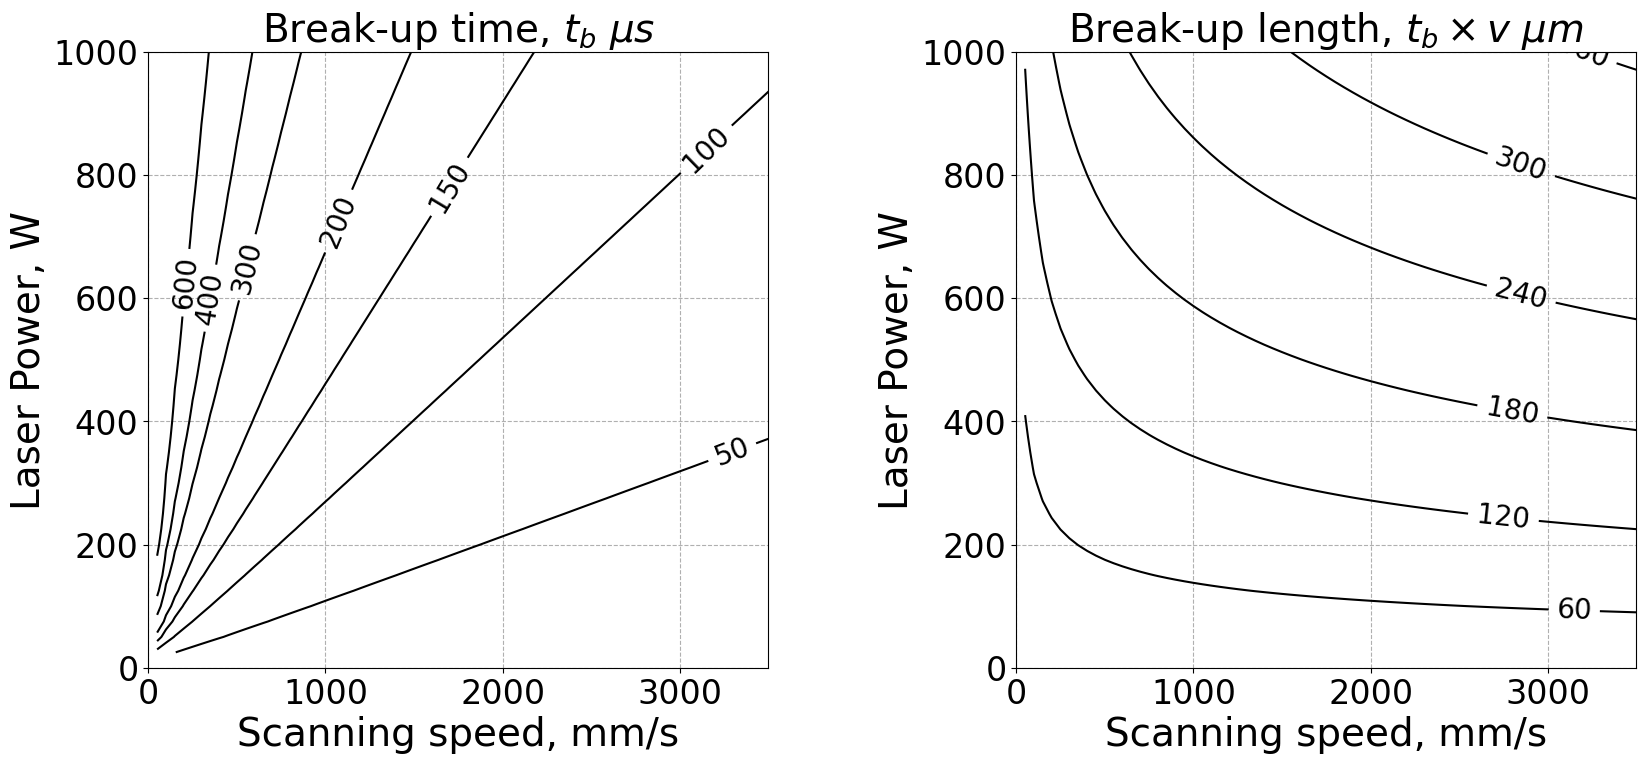

In [16]:
    zz1 = np.array(tb).reshape(PP.shape) * 1E+6 # unit: us
    zz2 = np.array(prl).reshape(PP.shape)* 1E+6 # unit :um

    height = 8   # 正方形の図形を作成するために図のサイズを設定
    fig = plt.figure(figsize=(2.4*height, height))
    plt.subplots_adjust(wspace=0.4)
    ax1 = fig.add_subplot(1,2,1)
    Plot_contour(ax1, vv*1E+3, PP, zz1,\
                 r'Break-up time, $t_b$ $\mu s$',\
                 xlim = [0, 3500], ylim = [0, 1000],\
                 levels = [50, 100, 150, 200, 300, 400, 600])
    ax2 = fig.add_subplot(1,2,2)
    Plot_contour(ax2, vv*1E+3, PP, zz2,\
                 r'Break-up length, $t_b \times v$ $\mu m$',\
                 xlim = [0, 3500], ylim = [0, 1000])
    plt.savefig("reighleigh.png")
    plt.show()

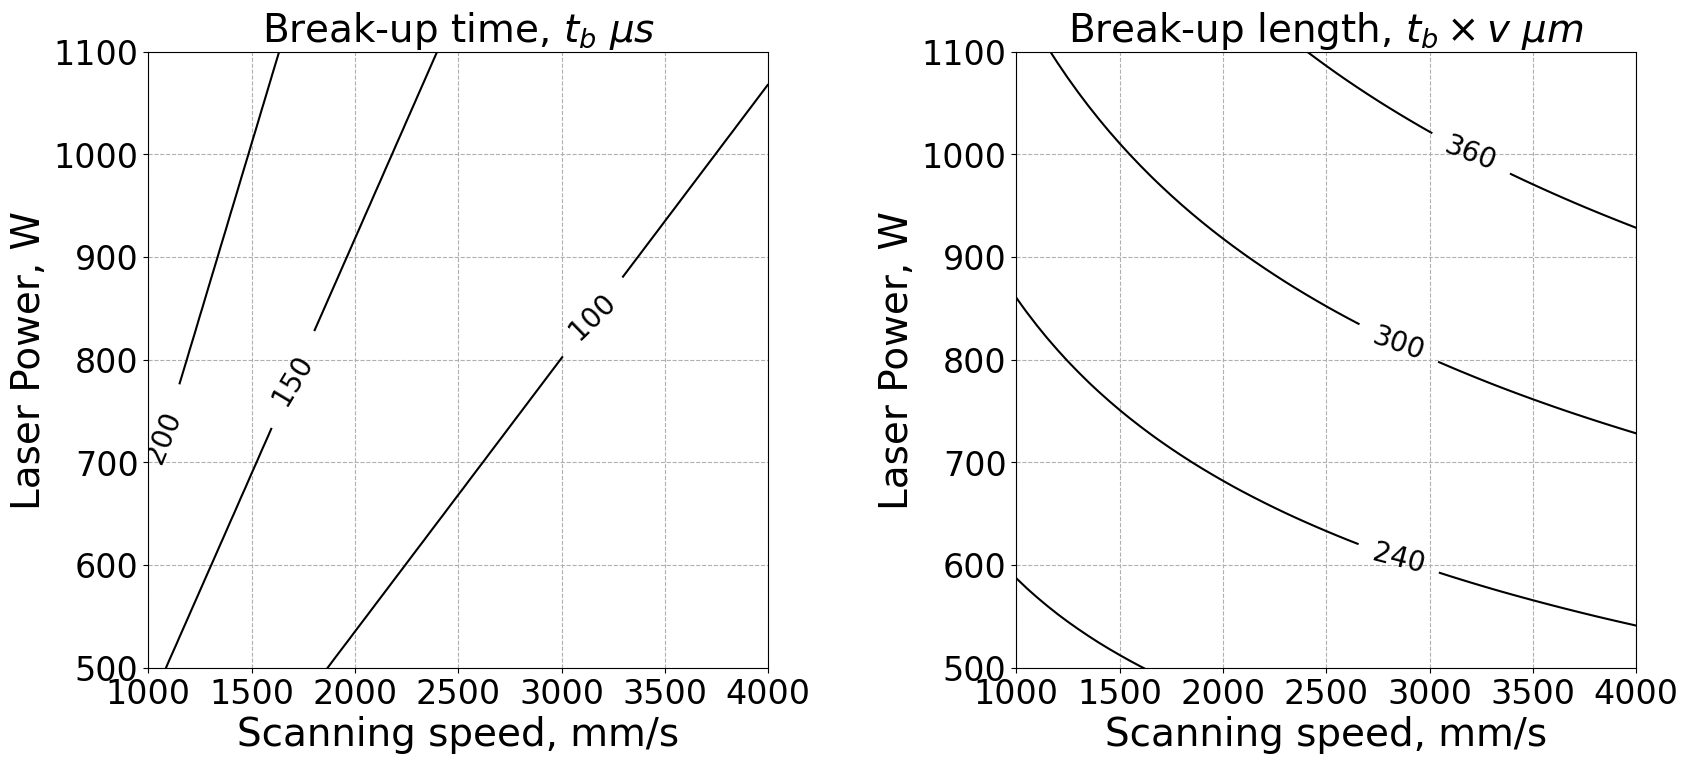

In [17]:
    zz1 = np.array(tb).reshape(PP.shape) * 1E+6 # unit: us
    zz2 = np.array(prl).reshape(PP.shape)* 1E+6 # unit :um

    height = 8   # 正方形の図形を作成するために図のサイズを設定
    fig = plt.figure(figsize=(2.4*height, height))
    plt.subplots_adjust(wspace=0.4)
    ax1 = fig.add_subplot(1,2,1)
    Plot_contour(ax1, vv*1E+3, PP, zz1,\
                 r'Break-up time, $t_b$ $\mu s$',\
                 xlim = [1000, 4000], ylim = [500, 1100],\
                 levels = [50, 100, 150, 200, 300, 400, 600])
    ax2 = fig.add_subplot(1,2,2)
    Plot_contour(ax2, vv*1E+3, PP, zz2,\
                 r'Break-up length, $t_b \times v$ $\mu m$',\
                 xlim = [1000, 4000], ylim = [500, 1100])
    plt.savefig("reighleigh-hphv.png")  #hphv: high power high velocity
    plt.show()